In [1]:
from random import seed
from random import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd

import matplotlib.colors as clr

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
x=np.arange(1,10).reshape(-1,1)
y=np.array([0,0,0,0,1,1,1,1,1])

In [3]:
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [4]:
x.shape

(9, 1)

In [5]:
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [6]:
print(model.intercept_)
model.coef_

[-5.29550199]


array([[1.17809125]])

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [8]:
bias=model.intercept_[0]
w1=model.coef_[0][0]
bias,w1

(-5.2955019876514, 1.1780912464363948)

In [9]:
z=bias+w1*x

In [10]:
sigmoid(z)

array([[0.01602563],
       [0.05024374],
       [0.14663658],
       [0.35821109],
       [0.64450107],
       [0.854836  ],
       [0.95031719],
       [0.98415966],
       [0.99506924]])

In [11]:
model.classes_

array([0, 1])

In [12]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [13]:
model.predict_proba(x)

array([[0.98397437, 0.01602563],
       [0.94975626, 0.05024374],
       [0.85336342, 0.14663658],
       [0.64178891, 0.35821109],
       [0.35549893, 0.64450107],
       [0.145164  , 0.854836  ],
       [0.04968281, 0.95031719],
       [0.01584034, 0.98415966],
       [0.00493076, 0.99506924]])

In [14]:
def f(x):
    return -x+5

In [15]:
def generateData(n):
    seed(1)
    min=0
    max=5
    L=[]
    for _ in range(n):
        valueX=random()
        scaledvalueX=min+(valueX*(max-min))
        valueY=random()
        scaledvalueY=min+(valueY*(max-min))
        x=round(scaledvalueX,1)
        y=round(scaledvalueY,1)
        y0=f(x)
        cl=0
        if(y>y0):
            cl=1
        L.append([x,y,cl])
    return L

In [16]:
data=generateData(100)
data=np.array(data)
X1=data[:,0]
X2=data[:,1]
C=data[:,2]

In [17]:
data

array([[0.7, 4.2, 0. ],
       [3.8, 1.3, 1. ],
       [2.5, 2.2, 0. ],
       [3.3, 3.9, 1. ],
       [0.5, 0.1, 0. ],
       [4.2, 2.2, 1. ],
       [3.8, 0. , 0. ],
       [2.2, 3.6, 1. ],
       [1.1, 4.7, 1. ],
       [4.5, 0.2, 0. ],
       [0.1, 2.7, 0. ],
       [4.7, 1.9, 1. ],
       [1.1, 2.1, 0. ],
       [0.1, 1.1, 0. ],
       [2.2, 2.5, 0. ],
       [1.2, 1.2, 0. ],
       [1.1, 2.3, 0. ],
       [1.4, 0.1, 0. ],
       [4.2, 2.8, 1. ],
       [3.2, 0.9, 0. ],
       [5. , 4.3, 1. ],
       [0.6, 1.7, 0. ],
       [3.6, 3.6, 1. ],
       [4.7, 2.1, 1. ],
       [4.2, 3.4, 1. ],
       [1.5, 2.9, 0. ],
       [4.4, 4.2, 1. ],
       [2.5, 2.9, 1. ],
       [0.2, 1.2, 0. ],
       [4. , 2.1, 1. ],
       [0.9, 2.7, 0. ],
       [3.5, 3.4, 1. ],
       [1.9, 2.2, 0. ],
       [2.5, 3.9, 1. ],
       [2.6, 2. , 0. ],
       [2.4, 0.1, 0. ],
       [0.2, 3.5, 0. ],
       [4.9, 3. , 1. ],
       [2. , 0.9, 0. ],
       [2.5, 4.9, 1. ],
       [3.9, 2.7, 1. ],
       [4.3, 1.2

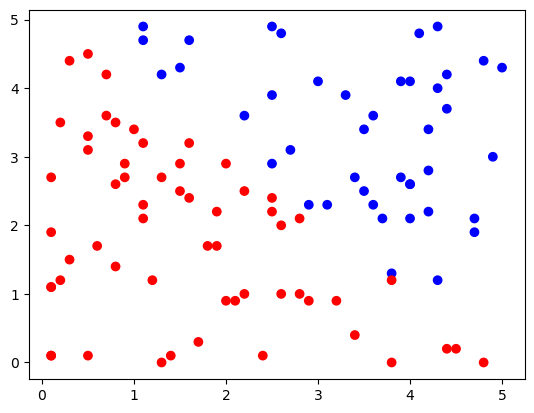

In [21]:
colors = ['red','blue']
plt.scatter(X1,X2,c=C,cmap=clr.ListedColormap(colors))

In [23]:
X=data[:,:2]
y=data[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
model=LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [35]:
bias=model.intercept_[0]

In [38]:
w1,w2=model.coef_[0][0],model.coef_[0][1]

In [42]:
bias,w1,w2

(-11.629845808025728, 2.352837756843742, 2.1167524203158545)

In [43]:
yhat=model.predict(X_test)

In [44]:
cm=confusion_matrix(y_test,yhat)
accuracy=accuracy_score(y_test, yhat)
precision=precision_score(y_test,yhat)
recall=recall_score(y_test,yhat)
f1=f1_score(y_test,yhat)

In [45]:
print(accuracy)

1.0


In [48]:
def getY(X1):
    return -w1/w2*X1-bias/w2

In [49]:
yFive=getY(X1)

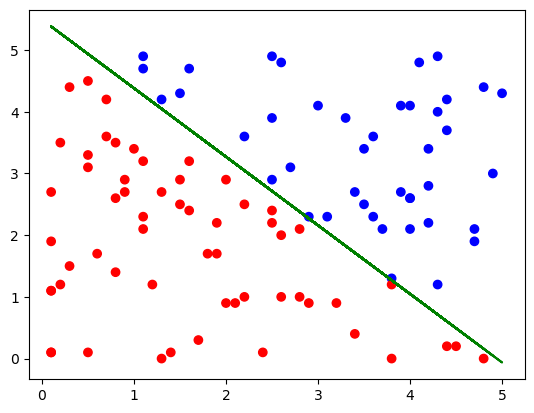

In [52]:
colors = ['red','blue']
plt.scatter(X1,X2,c=C,cmap=clr.ListedColormap(colors))
plt.plot(X1,yFive,color="g")

In [53]:
yhat=model.predict(X_test)

In [54]:
yhat

array([0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0.])

In [56]:
y_test

array([0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0.])

In [57]:
yhat+y_test

array([0., 2., 0., 0., 2., 2., 2., 0., 2., 2., 0., 2., 2., 2., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
#####################################

In [3]:
A=np.array([1,2,3])
B=np.exp(-A)
1/(1+B)

array([0.73105858, 0.88079708, 0.95257413])

In [4]:
bias,w1=0,1
def sigmoid(X):
    Z=bias+w1*X
    return 1/(1+np.exp(-Z))

In [5]:
sigmoid(np.array([1,2,3,4,5,6,7,8,9]))

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715,
       0.99752738, 0.99908895, 0.99966465, 0.99987661])